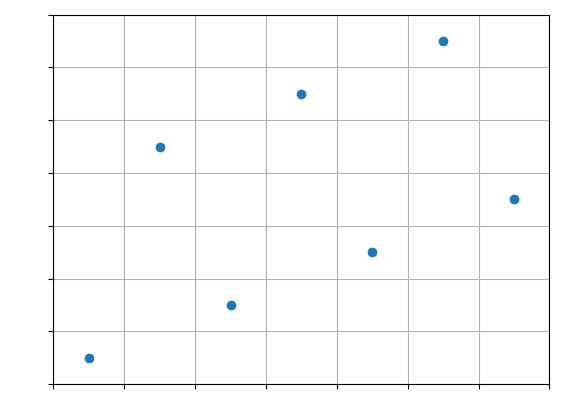

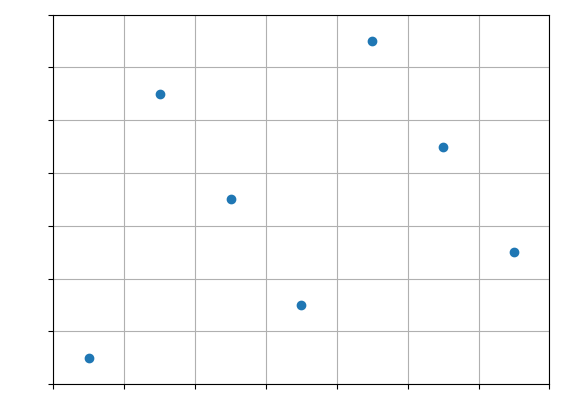

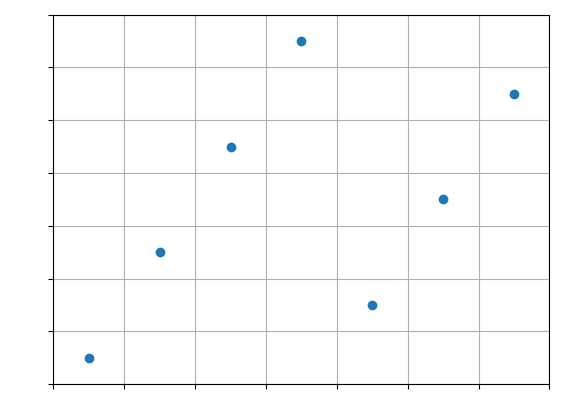

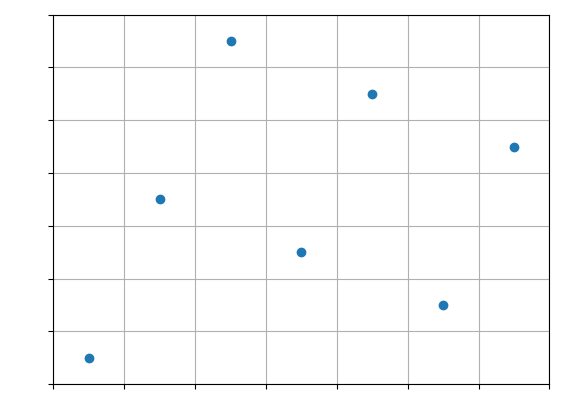

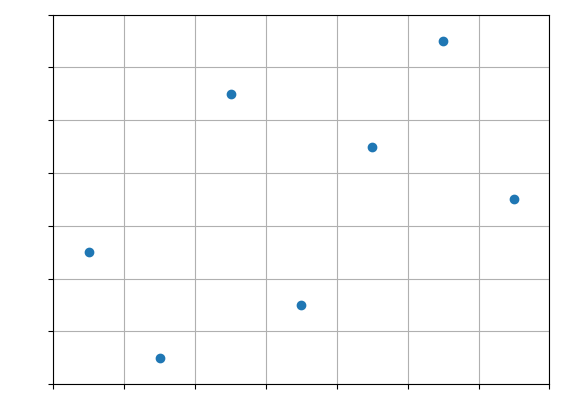

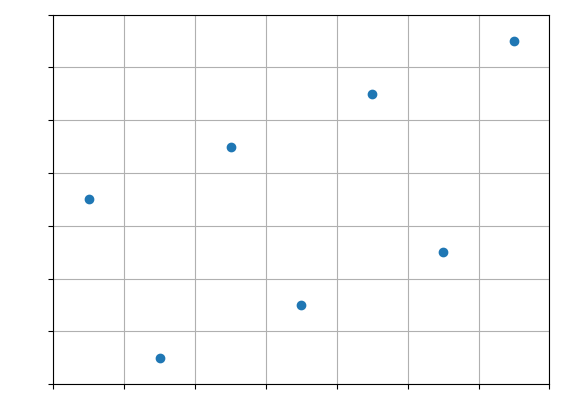

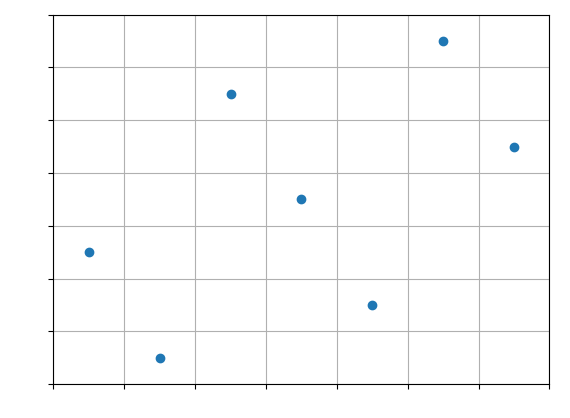

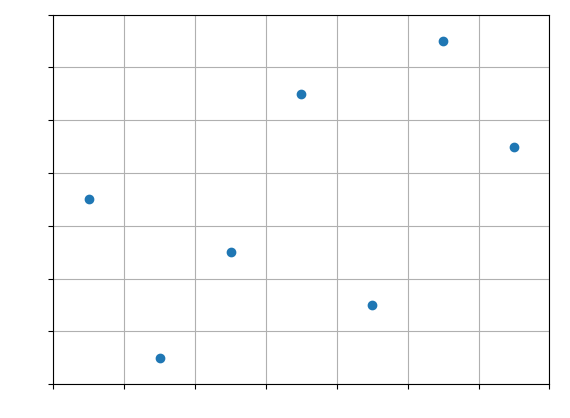

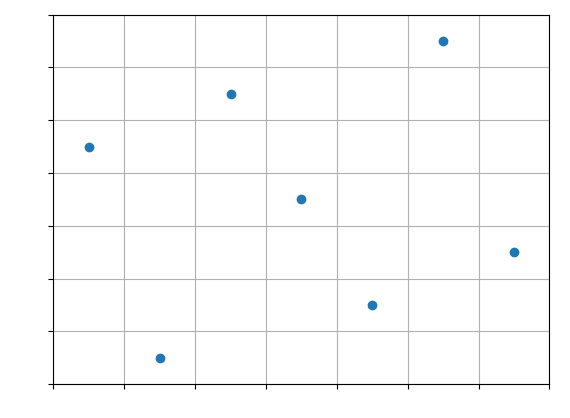

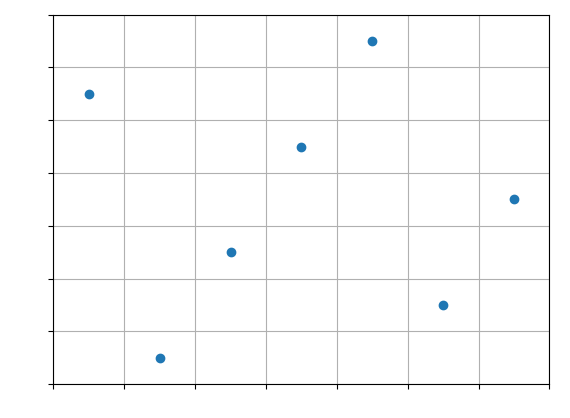

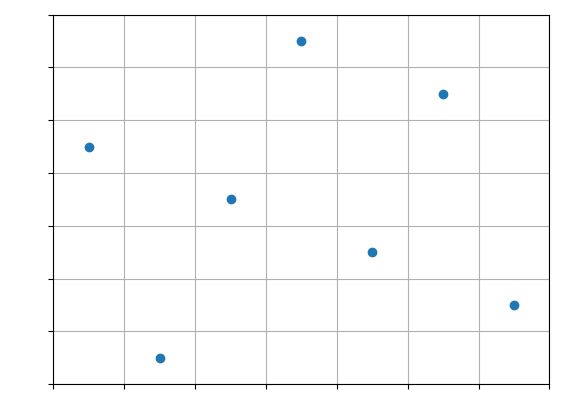

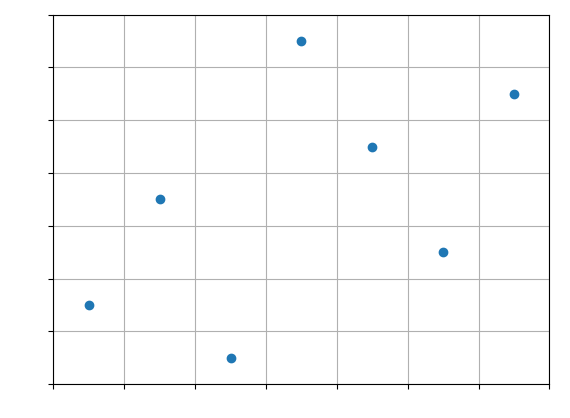

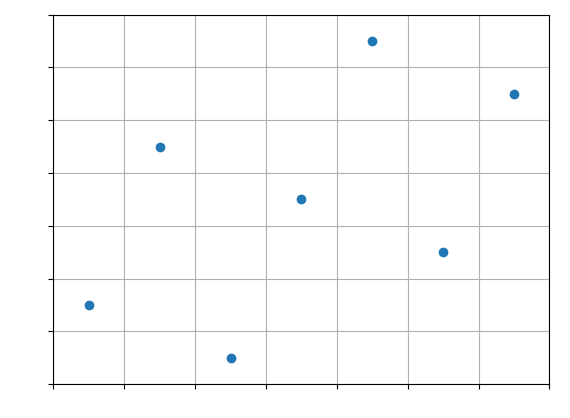

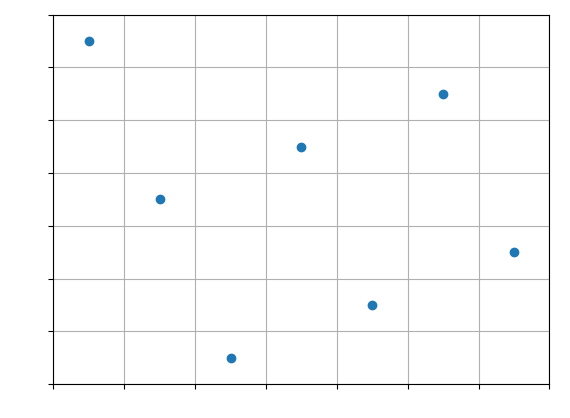

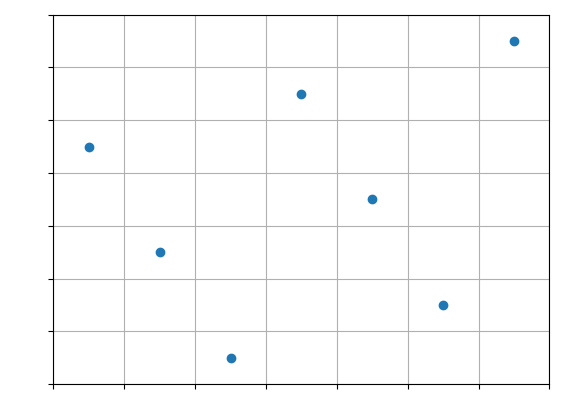

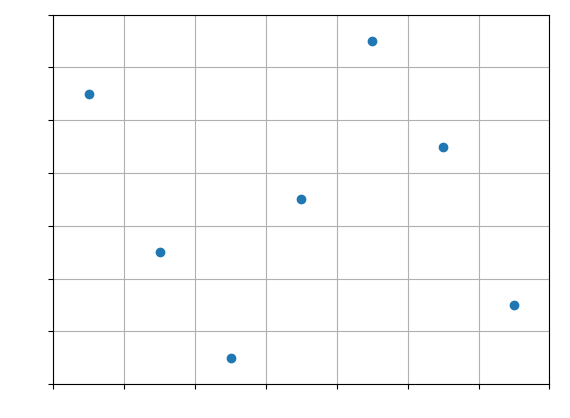

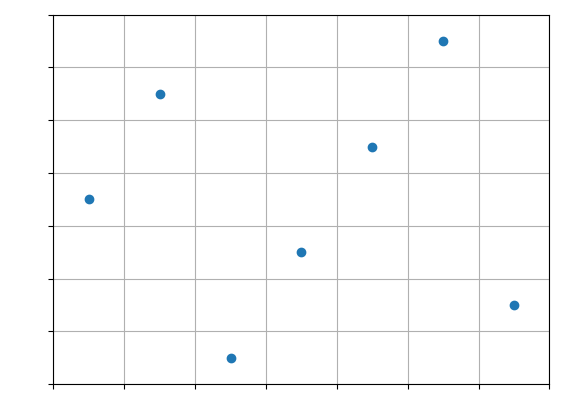

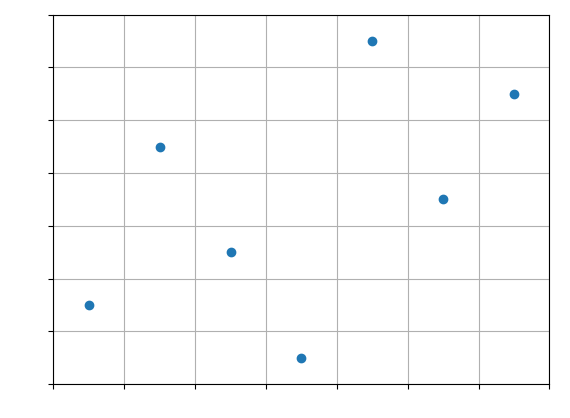

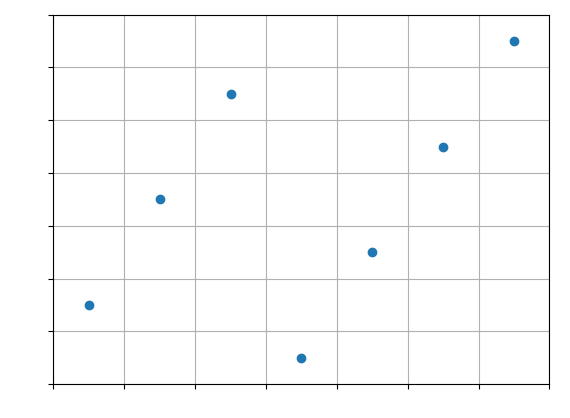

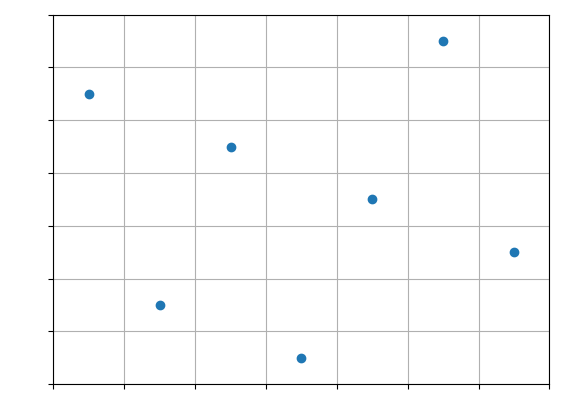

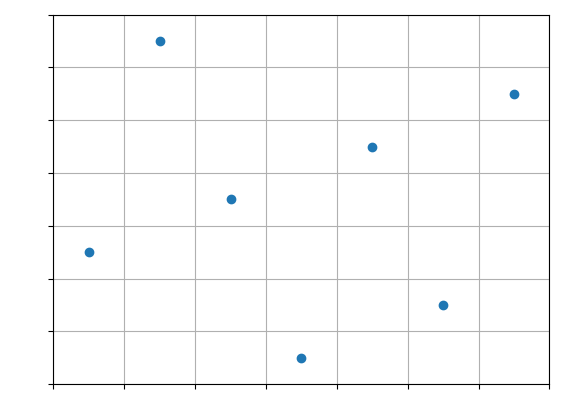

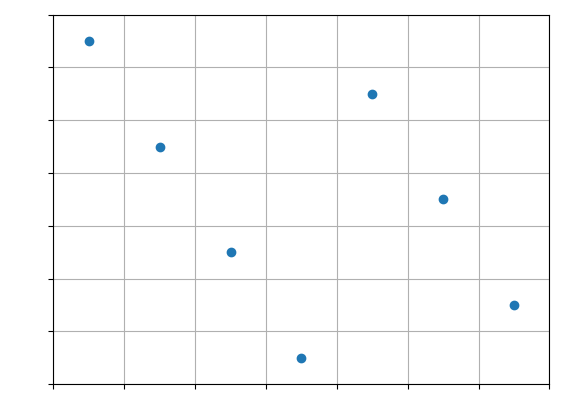

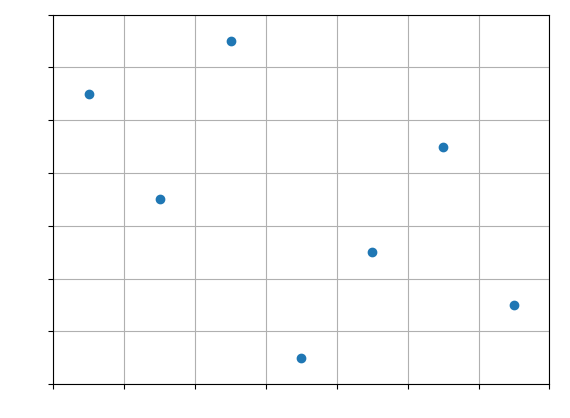

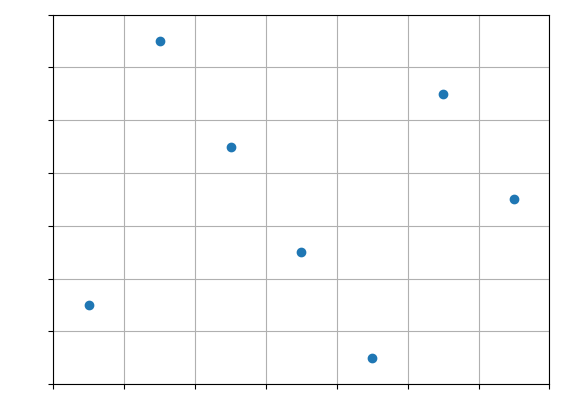

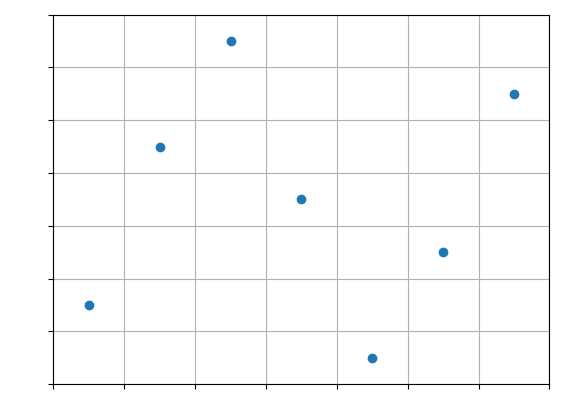

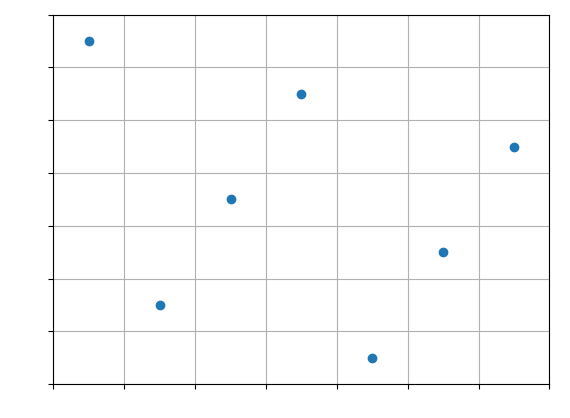

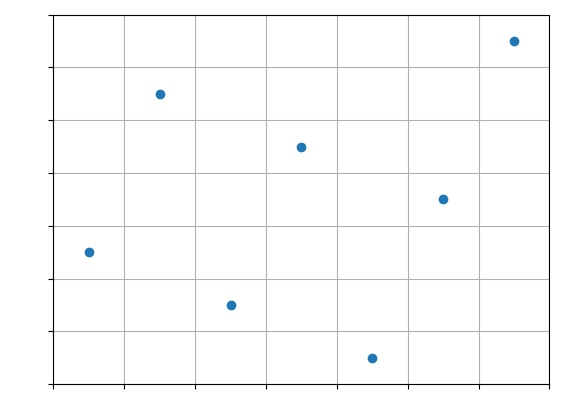

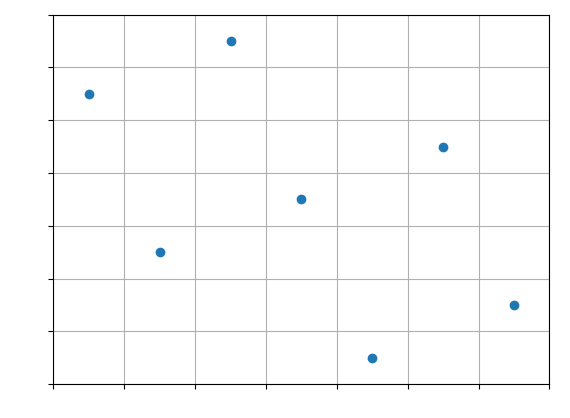

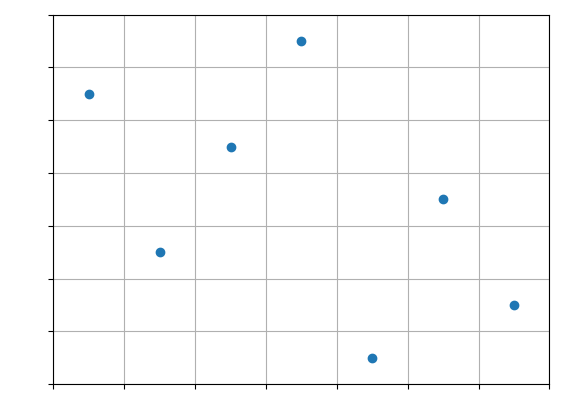

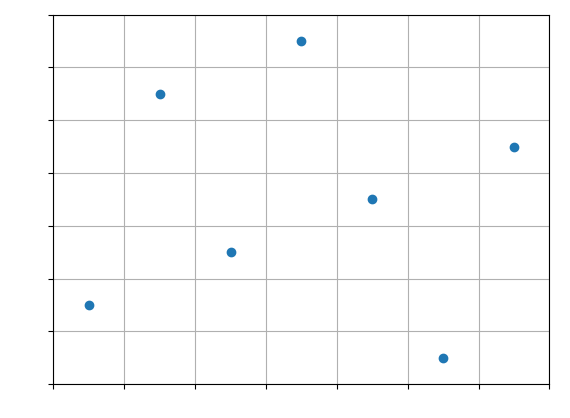

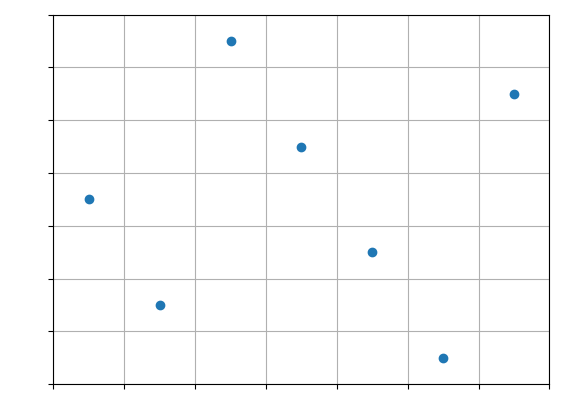

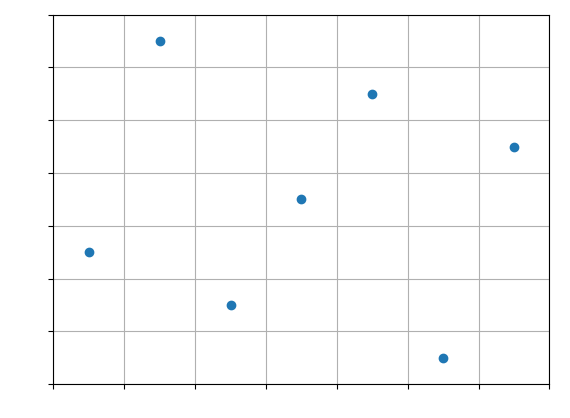

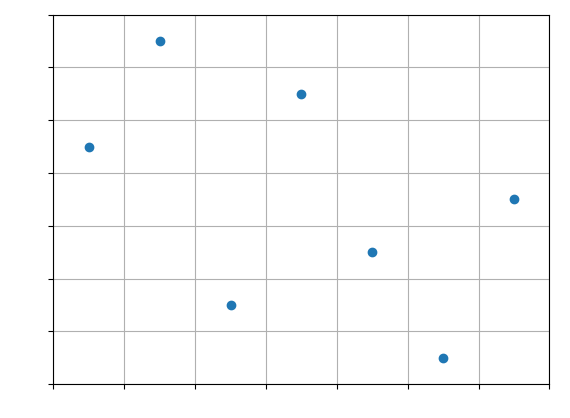

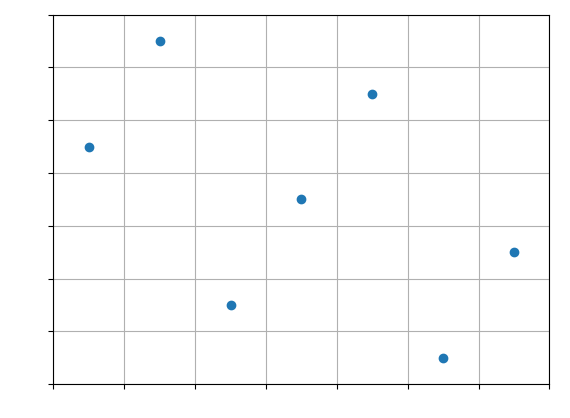

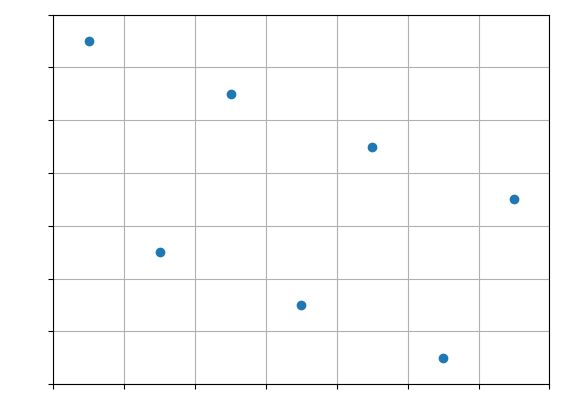

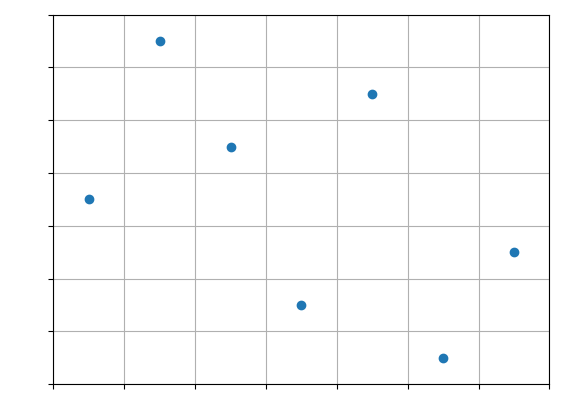

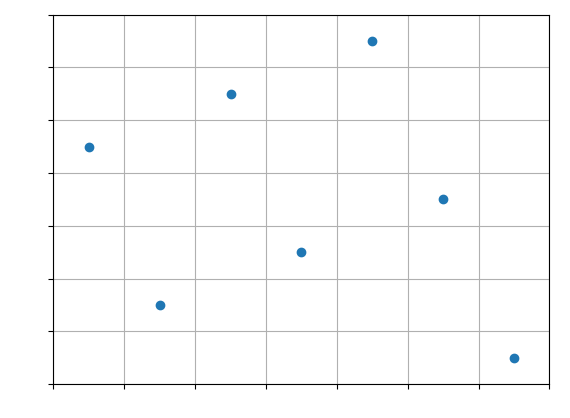

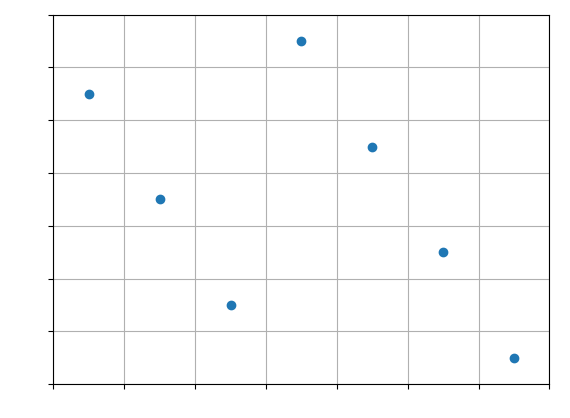

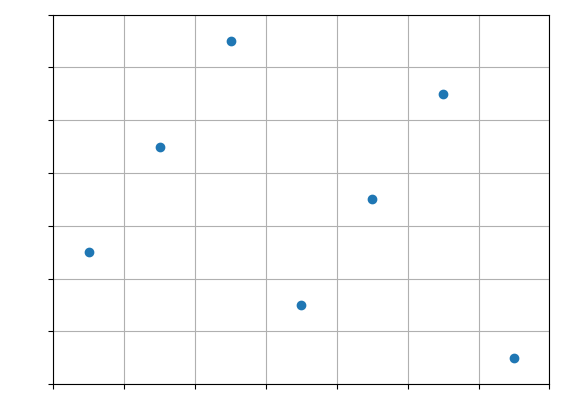

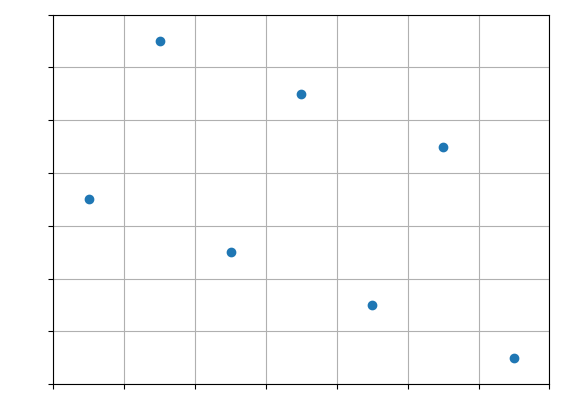

40 solutions to 7 queens... nasty code; needs to be refactored into a recursion.


In [4]:
# libs

import matplotlib.pyplot as plt
import numpy as np

# classes

class Config:
    def __init__(self, n):
        self.n = n

class Child:
    def __init__(self, x, y, parent, children, heir):        
        self.x          = x
        self.y          = y
        self.parent     = parent
        self.children   = children
        self.heir       = None
        
class Box:
    """ box always is off board, has no parent, has n children at first"""
    def __init__(self):
        config          = get_config() 
        self.children   = [Child(x, 0, self, None, None) for x in range(config.n)]
        self.heir       = None
        
# configs

def get_config():
    n       = get_n()
    config  = Config(n)
    return config

def get_n():
    n                   = 7
    return n

# model

def count_diagonal_intersections(coords, current):
    coords_x                = coords[0]
    coords_y                = coords[1]
    succ_height             = current.y+1
    height                  = succ_height - coords_y
    left_intersect_x        = coords_x   - height 
    right_intersect_x       = coords_x   + height
    
    return left_intersect_x, right_intersect_x 

def find_path_coords(box):
    path_coords = []
    index = box
    while index.heir != None:
        index           = index.heir
        index_coords    = [index.x, index.y]
        path_coords.append(index_coords)
    return path_coords
    
def find_legal_children_of_index(box, index):
    config             = get_config()
    path_coords        = find_path_coords(box)
    diagonal_bans      = []
    
    for i in path_coords:
        diagonal_xs        = count_diagonal_intersections(i, index)
        left = diagonal_xs[0]
        diagonal_bans.append(left)
        right = diagonal_xs[1]
        diagonal_bans.append(right)
    
    path_xs            = [xy[0] for xy in path_coords]
    any_children       = [Child(x, 1+index.y, index, None, None) for x in range(config.n)]
    untaken_children   = [child for child in any_children if child.x not in path_xs]
    not_diagonal       = [child for child in untaken_children if child.x not in diagonal_bans]
    
    return not_diagonal
    
# view

def draw(path):
    fig = plt.figure()
    plt.xlim(-0.5, config.n-0.5)
    plt.ylim(-0.5, config.n-0.5)
    ax  = fig.gca()
    ax.set_xticks(np.arange(-0.5, config.n+0.5, 1))
    ax.set_yticks(np.arange(-0.5, config.n+0.5, 1))
    plt.xticks(color='w')
    plt.yticks(color='w')
    plt.scatter([p[0] for p in path],[p[1] for p in path])
    plt.grid()
    plt.show()

# control
        
if __name__ == "__main__":
    
    solutions = 0
    
    config                  = get_config()
    box                     = Box()
    while len(box.children) > 0:
        box.heir           = box.children.pop(0) 
        box.heir.children  = find_legal_children_of_index(box, box.heir)
        while len(box.heir.children) > 0:
            
            box.heir.heir           = box.heir.children.pop(0) 
            box.heir.heir.children  = find_legal_children_of_index(box, box.heir.heir)
            while len(box.heir.heir.children) > 0:
                
                box.heir.heir.heir            = box.heir.heir.children.pop(0)
                box.heir.heir.heir.children   = find_legal_children_of_index(box, box.heir.heir.heir)
                while len(box.heir.heir.heir.children) > 0:
                    
                    box.heir.heir.heir.heir            = box.heir.heir.heir.children.pop(0)
                    box.heir.heir.heir.heir.children   = find_legal_children_of_index(box, box.heir.heir.heir.heir)
                    while len(box.heir.heir.heir.heir.children) > 0:
                        
                        box.heir.heir.heir.heir.heir            = box.heir.heir.heir.heir.children.pop(0)
                        box.heir.heir.heir.heir.heir.children   = find_legal_children_of_index(box, box.heir.heir.heir.heir.heir)

                        while len(box.heir.heir.heir.heir.heir.children) > 0:
                        
                            box.heir.heir.heir.heir.heir.heir            = box.heir.heir.heir.heir.heir.children.pop(0)
                            box.heir.heir.heir.heir.heir.heir.children   = find_legal_children_of_index(box, box.heir.heir.heir.heir.heir.heir)     

                            while len(box.heir.heir.heir.heir.heir.heir.children) > 0:
                        
                                box.heir.heir.heir.heir.heir.heir.heir            = box.heir.heir.heir.heir.heir.heir.children.pop(0)
                                box.heir.heir.heir.heir.heir.heir.heir.children   = find_legal_children_of_index(box, box.heir.heir.heir.heir.heir.heir.heir)     

                                path            = find_path_coords(box)
                                draw(path)
                                
                                solutions += 1
    print(solutions, "solutions to", config.n, "queens... nasty code; needs to be refactored into a recursion.")

In [3]:
def test_count_diagonal_intersections():
    coords  = [2,2]
    current = Child(4,3,None,None,None)
    diagonal_intersections = count_diagonal_intersections(coords, current)
    assert diagonal_intersections == (0,4)
    print("passed count diagonal intersections")

def test_find_legal_children_of_index():
    config                  = get_config()
    box                     = Box()
    while len(box.children) > 0:
        lowest             = box.children.pop(0)
        box.heir           = lowest
        index              = lowest
        children_of_index  = find_legal_children_of_index(box, index)
        assert isinstance(children_of_index, list)
        assert isinstance(children_of_index[0], Child)
        assert isinstance(children_of_index[0].x, int)
    print("passed find legal children of index type test")

def all_tests():
    test_count_diagonal_intersections()
    test_find_legal_children_of_index()

all_tests()

passed count diagonal intersections
passed find legal children of index type test
